# project 2 notebook

# Proposal
Data Link:
https://data.world/aaronhoffman/us-general-election-2012/workspace/file?filename=us-election-2012-results-by-county.csv

DATA DISCOVERY:
By searching the required domains in data world website I came across this dataset
DATA is free to download, Getting and using data doesn't violate terms of service. Documented EDA is not available for the data.But we should login with any gmail to get the data

Size of Data:
1.39 MB and  13 columns, 23238 rows in table

Context:
The data is about United States Election Vote count in 2012.

1.Votes polling percentage is always less than 70% in each county?
2.The count of PrecintsReporting is 95% matched with the count of TotalPrecincts?
3.Barack Obama took 60% of the popular vote.
4.Califonia has more total number of votes than Texas.


In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
election = pd.read_csv('https://query.data.world/s/hlcqnvgd7uthnsocydktldssywwy7c')

Let us now try and look into the data, understand the skeleton of it.

In [5]:
election.shape

(23238, 13)

In [6]:
election.dtypes

County2012Id          int64
StateCode            object
CountyName           object
CountyNumber          int64
FipsCode              int64
PrecintsReporting     int64
TotalPrecincts        int64
CountyTotalVotes      int64
SourceOrder           int64
Party                object
FirstName            object
LastName             object
Votes                 int64
dtype: object

In [7]:
election.isnull().sum()

County2012Id          0
StateCode             0
CountyName            0
CountyNumber          0
FipsCode              0
PrecintsReporting     0
TotalPrecincts        0
CountyTotalVotes      0
SourceOrder           0
Party                 0
FirstName            17
LastName              0
Votes                 0
dtype: int64

In [8]:
election['FirstName'].fillna(method='ffill', inplace=True) #filling the 17 null values in the FirstName 

In [9]:
election.isnull().sum()

County2012Id         0
StateCode            0
CountyName           0
CountyNumber         0
FipsCode             0
PrecintsReporting    0
TotalPrecincts       0
CountyTotalVotes     0
SourceOrder          0
Party                0
FirstName            0
LastName             0
Votes                0
dtype: int64

Now the data is clean and we don't have any null values

In [10]:
election.head()

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200


In [11]:
election.tail()

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
23233,23594,CO,Summit,6059,8117,20,20,15038,16,SEP,Jerry,White,1
23234,23595,CO,Teller,6060,8119,13,13,12144,16,SEP,Jerry,White,1
23235,23596,CO,Washington,6061,8121,6,6,2567,16,SEP,Jerry,White,1
23236,23597,CO,Weld,6062,8123,109,109,112695,16,SEP,Jerry,White,5
23237,23598,CO,Yuma,6063,8125,14,14,4481,16,SEP,Jerry,White,0


describe() summarizes the mean, standard deviation, min-max values and other statistical measures of a dataset’s distribution. This works only on columns that have numerical values.

In [12]:
election.describe()

,County2012Id,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Votes
count,23238.000000,23238.000000,23238.000000,23238.000000,23238.000000,2.323800e+04,23238.000000,2.323800e+04
mean,11798.502281,26355.031629,29393.794905,44.478354,44.678845,3.189770e+04,3.558051,5.300142e+03
std,6818.875460,13792.055582,14602.212720,152.736880,153.454698,9.414363e+04,2.507528,2.919487e+04
min,2.000000,1001.000000,1001.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00
25%,5881.250000,16091.000000,19181.000000,4.000000,4.000000,2.543000e+03,2.000000,1.600000e+01
50%,11831.500000,24011.000000,27021.000000,14.000000,14.000000,7.684000e+03,3.000000,1.060000e+02
75%,17700.750000,39048.750000,42096.500000,32.000000,32.000000,1.972600e+04,4.000000,1.854000e+03
max,23598.000000,51408.000000,56045.000000,4993.000000,4993.000000,2.427869e+06,16.000000,1.672164e+06


Now, that the data is all cleaned, the dataset is ready to be visualized.

# Hypothesis 1

# Vote polling percentage is always less than 70% in each county? 

In [13]:
election['Percentage'] = (election['Votes'] / election['CountyTotalVotes']) * 100


In [14]:
election

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes,Percentage
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696,41.567390
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354,26.575766
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329,21.566574
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873,51.252291
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200,26.218568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,23594,CO,Summit,6059,8117,20,20,15038,16,SEP,Jerry,White,1,0.006650
23234,23595,CO,Teller,6060,8119,13,13,12144,16,SEP,Jerry,White,1,0.008235
23235,23596,CO,Washington,6061,8121,6,6,2567,16,SEP,Jerry,White,1,0.038956
23236,23597,CO,Weld,6062,8123,109,109,112695,16,SEP,Jerry,White,5,0.004437


In [15]:
election.sort_values(by='Percentage', ascending=False)

,County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes,Percentage
6539,6619,TX,King,44135,48269,5,5,145,2,GOP,Mitt,Romney,139,95.862069
1074,1093,SD,Shannon,42056,46113,9,9,3130,1,Dem,Barack,Obama,2922,93.354633
8597,8693,ID,Madison,13033,16065,20,20,14412,2,GOP,Mitt,Romney,13445,93.290314
4931,4990,CT,Hartford,7064,9003,24,24,34037,1,Dem,Barack,Obama,31735,93.236772
6601,6681,TX,Roberts,44197,48393,6,6,439,2,GOP,Mitt,Romney,408,92.938497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375,8468,ME,Hancock Cty Townships,20898,23009,0,1,0,2,GOP,Mitt,Romney,0,NaN
11852,12065,ME,Upton,20597,23017,0,1,0,3,Lib,Gary,Johnson,0,NaN
12886,13107,ME,Hancock Cty Townships,20898,23009,0,1,0,3,Lib,Gary,Johnson,0,NaN
16096,16357,ME,Upton,20597,23017,0,1,0,4,Grn,Jill,Stein,0,NaN


Text(0.5, 1.0, 'Random 10 County with highest votes polled ')

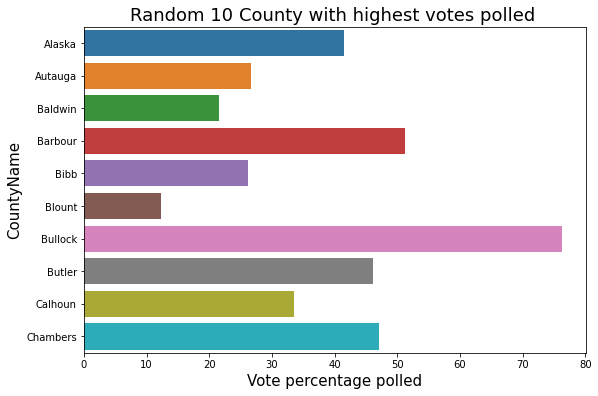

In [16]:
plt.figure(figsize=(9,6))
# make barplot
sns.barplot(x='Percentage', y="CountyName", data=election.head(10))
# set labels
plt.xlabel("Vote percentage polled", size=15)
plt.ylabel("CountyName", size=15)
plt.title("Random 10 County with highest votes polled ", size=18)


In the graph we can see that Bullock county have more than 70% votes polled .By this we can say that our hypothesis 1 is incorrect

# Hypothesis 2

# The count of PrecintsReporting is 95% matched with the count of TotalPrecincts?

In [17]:
comparision_precincts=[election.apply(lambda x: x['TotalPrecincts'] == x['PrecintsReporting'], axis = 1)]

In [18]:
a=pd.DataFrame(comparision_precincts).transpose()


Text(0.5, 1.0, 'comparision of both the values TotalPrecincts and PrecintsReporting If values matched its true else false')

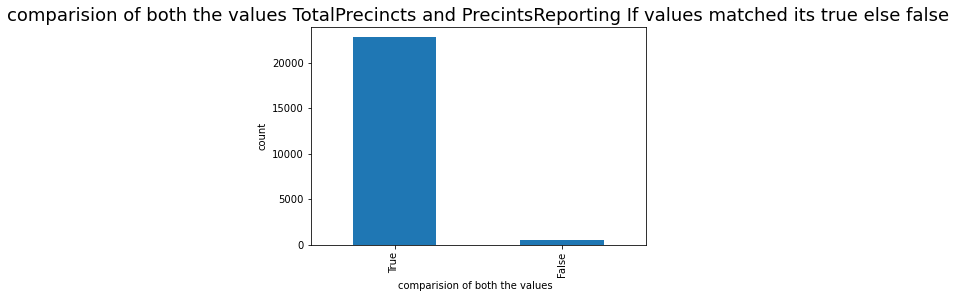

In [19]:
ax=a[0].value_counts().plot(kind='bar')
ax.set_ylabel('count')
ax.set_xlabel('comparision of both the values  ')
plt.title('comparision of both the values TotalPrecincts and PrecintsReporting If values matched its true else false', size=18)

In the graph we can see that TotalPrecincts and PrecintsReporting matches .By this we can say that our hypothesis 2 is correct

# Hypothesis 3

# Barack Obama took 60% of the popular vote

In [20]:
sum_votes=election['Votes'].sum()

In [21]:
Obama_Votes=election.loc[election['LastName'] == 'Obama','Votes'].sum()

In [35]:
other_votes=sum_votes - Obama_Votes

In [36]:
other_votes

60862778

In [37]:
Obama_Votes

62301929

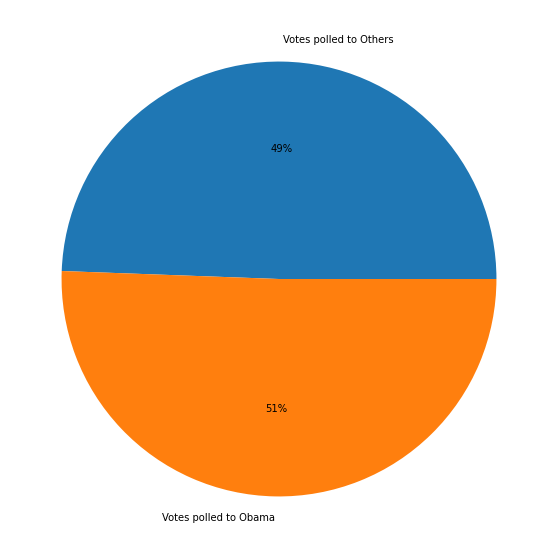

In [54]:
Votes = ['Votes polled to Others', 'Votes polled to Obama']
  
data = [60862778,62301929]
  
# Creating plot
fig = plt.figure(figsize =(15, 10))
plt.pie(data, labels = Votes,autopct='%.0f%%')
  
# show plot
plt.show()

The above pie chart represents the percentage of votes polled to obama. By this we can say our hypothesis 3 is Incorrect

# Hypothesis 4

# Califonia has more total number of votes than Texas

In [64]:
califonia_Votes=election.loc[election['StateCode'] == 'CA','CountyTotalVotes'].sum()

In [65]:
Texas_Votes=election.loc[election['StateCode'] == 'TX','CountyTotalVotes'].sum()

In [66]:
califonia_Votes

63231936

In [67]:
Texas_Votes

31851196

 From the above code we can find that the state Califonia have more votes when we compare with Texas. By this way we can say that Hypothesis 4 is correct